In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
import os
from PIL import Image

In [2]:
model_trained = load_model("model_detect_image.keras")

In [3]:
def otsu_thresholding(image):
    # Tính histogram của ảnh
    hist = np.histogram(image, bins=256, range=(0, 256))[0]

    total_pixels = image.size
    sum_total = np.sum(image)
    sum_b = 0
    weight_b = 0
    max_variance = 0
    optimal_threshold = 0

    for threshold in range(256):
        weight_f = np.sum(hist[:threshold]) / total_pixels
        weight_b = 1 - weight_f

        if weight_f == 0 or weight_b == 0:
            continue

        sum_f = np.sum(np.arange(threshold) * hist[:threshold])
        mean_f = sum_f / (weight_f * total_pixels)

        mean_b = (sum_total - sum_f) / (weight_b * total_pixels)

        variance_between = weight_f * weight_b * ((mean_f - mean_b) ** 2)

        if variance_between > max_variance:
            max_variance = variance_between
            optimal_threshold = threshold

    return optimal_threshold

In [4]:
characters_list = [chr(i) for i in range(ord('A'), ord('Z') + 1)]

In [5]:
def detect_characters(img):
    image_gray = cv2.resize(img, (28, 28))
    print("Ảnh nhị phân hóa")
    threshold_value = otsu_thresholding(image_gray)
    binary_image = (image_gray > threshold_value).astype(
        np.uint8
    )  # > threshold = 1 else = 0
    binary_image[binary_image == 1] = 255
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")
    plt.show()

    image_text = cv2.resize(binary_image, (28, 28))
    result_pred = np.argmax(
        model_trained.predict(image_text.reshape(-1, 28, 28, 1)), axis=-1
    )
    return characters_list[result_pred[0]]

In [6]:
# Đường dẫn tới thư mục chứa ảnh
folder_path = './Data/image_test'

file_list = os.listdir(folder_path)

images = []

for image_file in [file for file in os.listdir(folder_path) if file.lower().endswith(('.png'))]:
    image_path = os.path.join(folder_path, image_file)
    images.append(np.array(Image.open(image_path)))
    
print(f'Đã đọc {len(images)} file ảnh.')

Đã đọc 10 file ảnh.


IMAGE TEST


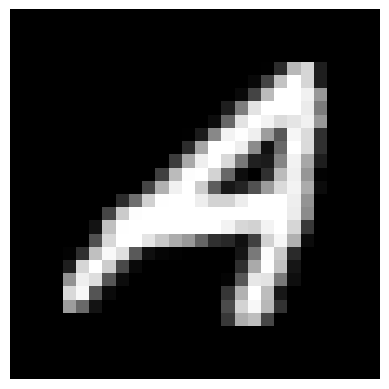

Ảnh nhị phân hóa


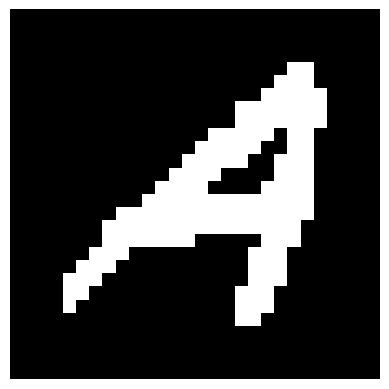

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Kết quả nhận dạng:  A


In [7]:
image = images[0]
print("IMAGE TEST")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

print("Kết quả nhận dạng: ", detect_characters(image))